In [1]:
!ls

Draft Notebook.ipynb
SyriaTel Logo.jpg
SyriaTel Presentation.pptx
Telecommunications_Image.jpg
bigml_59c28831336c6604c800002a.csv
images
resource.txt


![Telecommunications_Image](Telecommunications_Image.jpg)

## 1.0 Business Understanding

<div>
    <ol>
        <li>
            <h3>Overview</h3>
            <p>
                The telecommunications industry brags as being one of the few industries with the stiffest competitions around.
                Volitile customer retention rates due to economic downturns, increased costs, appealing competition products and other factors, increased technology, globalisation and unnecessary government interference and restrictions are all contributing factors to this competition. 
                Syria Telecommunications faces the same issues as other telecommunication giants if not at a greater rate. The industry accepted churn rate is between 5% - 7%. However, Syria Telecommunications faces a far worse challenge as the mean of it's churn rate rises to near 15%, when this data was collected. 
            </p>
        </li>
                <li>
            <h3>Problem Statement</h3>
            <p>NOT DONE
                    </p>
        </li>
        <li>
            <h3>Objectives</h3>
            <ul>
                <li>To identify the key states that hold most customers</li>
                <li>To identify factors leading to increased churn rates</li>
                <li>To create a classification model that predicts whether a customer will churn with a recall of over 80%</li>
                <li>To give customer retention recommendations</li>
            </ul>
        </li>
        <li>
            <h3>Proposed Solution</h3>
            <p>Syria Telecommunications management understands that is cheaper to retain the existing customer base than to seek new business and new customers. Management seeks to remedy the situation by tasking the Customer Relations and Retention Department to understand and remedy the situation as quickly as possible.</p>
            <p>This kind of situation requires the use of classification model that is up to task to give a recall value of over 80% - reducing the risk of any false negatives occuring in our model.</p>
        </li>        
        <li>
            <h3>Brief Conclusion</h3>
            <p>
                Retaining the customer base will lead to less churn rates, improved financial returns, increased loyalty from our customers and in the future an ability to attract other customers carving a larger fraction in the market
            </p>
        </li>
        <li>
            <h3></h3>
            <p></p>
        </li>
    </ol>
</div>

## 2.0 Data Understanding

The data was sourced from Kaggle.

There are 3333 records and 21 features in the data.

Associated columns included are:

- `State`: The location of the customer.
- `Account Length`: The number of days the account was held by the customer.
- `Area Code`: The area code of the customer.
- `Phone Number`: Phone number assigned to the user.
- `International Plan`: Indicator of whether the customer has an international plan.
- `Voice Mail Plan`: Indicator of whether the customer has a voicemail plan.
- `Number Vmail Messages`: Number of voicemails sent.
- `Total Day Minutes`: Number of minutes the customer has been in calls during the day.
- `Total Day Calls`: Total calls made during the day.
- `Total Day Charge`: Billed charge to the customer for all day calls.
- `Total Eve Minutes`: Number of minutes the customer has been in calls during the evening.
- `Total Eve Calls`: Total calls made during the evening.
- `Total Eve Charge`: Billed charge to the customer for all evening calls.
- `Total Night Minutes`: Number of minutes the customer has been in calls during the night.
- `Total Night Calls`: Total calls made during the night.
- `Total Night Charge`: Billed charge to the customer for all night calls.
- `Total Intl Minutes`: Total number minutes on international calls.
- `Total Intl Calls`: Total internation calls made.
- `Total Intl Charge`: Billed charge to the customer for all international calls.
- `Customer Service Calls`: Number of calls made to customer service.
- `Churn`: Indication of whether the customer terminated their contract.

## 3.0 Data Preparation

In this section, we explore the data by understanding aspects of the data - including, loading the data, identifying the shape, features dtypes, and understanding the summary statistics as required

In [104]:
# Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Metric Evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
import xgboost as xb

In [3]:
class DataPreparation():
    """
    This class takes a dataframe and returns some basic information.
    Consider making this ONE METHOD that returns everything.
    """
    def __init__(self, data):
        self.data = data
        
    def read_head(self):
        """Returns the first 5 rows"""
        return self.data.head()
    
    def read_columns(self):
        """Returns the columns of the DataFrame"""
        return self.data.columns
    
    def read_info(self):
        """Returns the features, datatypes and non-null count"""
        return self.data.info()
    
    def read_describe(self):
        """Returns the statistical summary of the dataset"""
        return self.data.describe()
    
    def read_shape(self):
        """Returns the number of rows and columns"""
        return self.data.shape
    
    def read_corr(self):
        """Returns a correlation dataframe"""
        return self.data.corr()
    
    def read_corr_wrt_target(self, target='churn'):
        """Returns a Series containing the correlation of features with respect to target"""
        return self.data.corr()[target].sort_values(ascending=False)
    
    def read_multicollinearity(self, target='churn'):
        """Returns a correlation dataframe without the target"""
        return self.data.corr().iloc[0:-1, 0:-1]
    
    def read_na(self):
        """Returns the sum of all null values per feature"""
        return self.data.isna().sum()
    
    def read_duplicated(self):
        """Returns the sum of all duplicated records"""
        return self.data.duplicated().sum()

In [5]:
dp = DataPreparation(data=df)

dp.read_head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# Explore the column names
dp.read_columns()

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
# Explore features and their datatypes
dp.read_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

##### Comment
All the features seem to be in the right dtypes except area code which seems more categorical than numerical.

In [8]:
# Explore the statistical summary
dp.read_describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# Explore any correlations
dp.read_corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [10]:
# Investigating feature correlation within themselves
dp.read_multicollinearity()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


##### Comments
- `total day minutes` and `total day charge` have a perfect correlation. We should drop one of them to avoid any multicollinearity
- `total eve minutes` and `total eve charge` have a perfect correlation. We should drop one of them to avoid any multicollinearity
- `total night minutes` and `total night charge` have a perfect correlation. We should drop one of them to avoid any multicollinearity
- `total intl minutes` and `total intl charge` have a perfect correlation. We should drop one of them to avoid any multicollinearity

## 4.0. Data Cleaning

We explore if the data needs any cleaning according to the Data Preparation section we have explored above.

### 4.1.1. Missing Values

In [11]:
# Find the number of missing values
dp.read_na()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### 4.1.2. Duplicated Values

In [12]:
# Check for Duplicates
dp.read_duplicated()

0

##### Comments
The were no issues pertaining the cleaning of the data - we received a very clean dataset with no missing values and no duplicate records.

### 4.1.3. Conversion of feature datatypes

In [13]:
# Conversion of the 'area code' into a Categorical dtype
df['area code'] = pd.Categorical(df['area code'])
df['area code'].dtype

CategoricalDtype(categories=[408, 415, 510], ordered=False)

### 4.1.4. Conversion of feature values

In [14]:
df['churn'] = df['churn'].replace([False, True], ['False', 'True'])

### 4.1.5. Drop unnecessary columns

In [15]:
df = df.drop('phone number', axis=1)

# Test
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

## 5.0 Data Exploration

In [16]:
# Split the Categorical columns from the Numerical Columns
num_cols = df.select_dtypes(include=['number', 'float', 'int']).columns
cat_cols = df.select_dtypes(exclude=['number', 'float', 'int']).columns

In [17]:
def view_value_counts(cat_columns):
    for item in cat_columns:
        print(item.capitalize())
        values = df[item].value_counts()
        print(values[:10] if len(values) > 10 else values)
        print("")
        
view_value_counts(cat_cols)

State
WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
Name: state, dtype: int64

Area code
415    1655
510     840
408     838
Name: area code, dtype: int64

International plan
no     3010
yes     323
Name: international plan, dtype: int64

Voice mail plan
no     2411
yes     922
Name: voice mail plan, dtype: int64

Churn
False    2850
True      483
Name: churn, dtype: int64



##### Comment
- Our top customers are come from West Virginia, Minesota and Virginia.
- The area code with the highest clientelle base 415.
- The ratio between customers without an international plan against those who do is around 10 to 1.
- The ratio between customers who don't churn against those who do is around 17 to 1.

#### Deep Dive Into the dataset

In [18]:
df.groupby('churn').median().loc[:,]

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,,
False,100,0,177.2,100,30.12,199.6,100,16.97,200.25,100,9.01,10.2,4,2.75,1
True,103,0,217.6,103,36.99,211.3,101,17.96,204.80,100,9.22,10.6,4,2.86,2


In [19]:
df.groupby('churn').mean().loc[:,]

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,,
False,100.793684,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,102.664596,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


Grouping the data by the `churn` feature reveals alot of information about the two groups (those who churned and those who didn't). To ensure that we do not lose any information in the averages we should create two seperate datasets according the churn values and evaluate the data from that point.

In [20]:
# Maintain seperate datasets were 'churn' is either True or False
stayed_df = df[df['churn']=='False']
left_df = df[df['churn']!='False']

### 5.1. Which are some differentiating features between the customers who stayed versus those who left?

### 5.1.1. Area Code

In [21]:
df['area code'].value_counts(normalize=True)

415    0.496550
510    0.252025
408    0.251425
Name: area code, dtype: float64

In [22]:
stayed_df['area code'].value_counts(), left_df['area code'].value_counts()

(415    1419
 408     716
 510     715
 Name: area code, dtype: int64,
 415    236
 510    125
 408    122
 Name: area code, dtype: int64)

In [23]:
stayed_df['area code'].value_counts(normalize=True), left_df['area code'].value_counts(normalize=True)

(415    0.497895
 408    0.251228
 510    0.250877
 Name: area code, dtype: float64,
 415    0.488613
 510    0.258799
 408    0.252588
 Name: area code, dtype: float64)

Area code 415 represents the area code where most of our customers stayed and left at the same time. The ratios between the stayed versus left customers seems uniform.

### 5.1.2. Customer Service Calls

In [24]:
stayed_df['customer service calls'].mean(), left_df['customer service calls'].mean()

(1.4498245614035088, 2.229813664596273)

In [25]:
csc_states = df.groupby(['state']).sum()[['customer service calls']].sort_values(by='customer service calls',ascending=False)[:10]
csc_states

,customer service calls
state,
WV,159
NY,142
OR,135
MN,130
VT,127
AL,125
VA,123
ID,122
IN,120


In [26]:
avg_css_states = df.groupby(['state']).mean()[['customer service calls']].sort_values(by='customer service calls',ascending=False)[:10]
avg_css_states

,customer service calls
state,
AR,1.981818
GA,1.925926
CO,1.787879
OK,1.786885
ME,1.741935
VT,1.739726
OR,1.730769
KY,1.711864
NY,1.710843


The mean of the number of calls made to the customer service center were considerably in those made by the customers who stayed.

The state with the highest number of calls to the service center in absolute terms was West Virginia, Oregon and New York.

From an average perspective, the highest averages per state to the customer service centers were from Arizona, Georgia and Colarado.

### 5.1.3. Domestic Plans

#### 5.1.3.1.  Minutes purchased throughout the three periods - day, evening and night

In [27]:
stayed_min = (stayed_df['total day minutes'] + stayed_df['total eve minutes'] + stayed_df['total night minutes']).mean()
left_min = (left_df['total day minutes'] + left_df['total eve minutes'] + left_df['total night minutes']).mean()

stayed_min, left_min

(574.352245614035, 624.555900621118)

##### Observation
***
The mean of the minutes purchased by the customers for domestic usage who left was significantly more than those who stayed.

#### 5.1.3.2. Total Charges across the three periods - day, evening and night

In [28]:
stayed_charges = (stayed_df['total day charge'] + stayed_df['total eve charge'] + stayed_df['total night charge']).mean()
left_charges = (left_df['total day charge'] + left_df['total eve charge'] + left_df['total night charge']).mean()

stayed_charges, left_charges

(55.70540350877194, 62.466418219461694)

The mean of the charges for domestic usage for the customers who left was significantly more than those who stayed.

### 5.1.4. International Plans

#### 5.1.4.1. International Plans Opted

In [29]:
stayed_df['international plan'].value_counts(normalize=True), left_df['international plan'].value_counts(normalize=True)

(no     0.934737
 yes    0.065263
 Name: international plan, dtype: float64,
 no     0.716356
 yes    0.283644
 Name: international plan, dtype: float64)

6% of the proportion of consumers who stayed had an international plan while 28% of the customers who left had an international plan connected with their account.

#### 5.1.4.2. Total International Plans -  Minutes and Charges

In [30]:
df.groupby(['churn', 'international plan']).mean().iloc[:, -4:-1]

total intl minutes  total intl calls  \
churn international plan                                         
False no                           10.185473          4.493243   
      yes                           9.777957          5.102151   
True  no                           10.271387          4.251445   
      yes                          11.782482          3.941606   

                          total intl charge  
churn international plan                     
False no                           2.750586  
      yes                          2.640538  
True  no                           2.774017  
      yes                          3.181314

In [31]:
stayed_df['total intl minutes'].mean(), left_df['total intl minutes'].mean()

(10.158877192982455, 10.700000000000001)

In [32]:
stayed_df['total intl charge'].mean(), left_df['total intl charge'].mean()

(2.7434035087719297, 2.8895445134575573)

The data indicates higher average values in terms of minutes purchased and bill charged to the consumers who left over those who stayed.

### 5.1.5. Account Lengths

#### 5.1.5.1 Account Lengths Exploration

In [33]:
stayed_df['account length'].mean(), left_df['account length'].mean()

(100.79368421052632, 102.66459627329192)

#### 5.1.5.2. Account Lengths and States

In [34]:
df.groupby(['state']).mean()[['account length']].sort_values(by='account length', ascending=False)[:10]

,account length
state,
FL,109.571429
OK,108.262295
LA,108.235294
KS,106.785714
ND,106.209677
VA,105.935065
WY,105.740260
DC,105.722222
HI,105.471698


#### 5.1.5.3. Account Lengths against Customer Service Calls

In [35]:
df.groupby(['churn', 'customer service calls']).mean()[['account length']]

account length
churn customer service calls                
False 0                           101.550413
      1                           101.386213
      2                            99.197917
      3                           100.142857
      4                           100.333333
      5                           109.192308
      6                           100.875000
      7                           125.000000
      8                            64.000000
True  0                            99.673913
      1                           105.196721
      2                            99.436782
      3                           112.727273
      4                           105.421053
      5                            98.250000
      6                            84.071429
      7                           109.000000
      8                           103.000000
      9                           102.500000

From the summaries above, we can observe that the customers who left held on their accounts more than the customers who stayed.

On average, customers from Florida, Oklahoma and Los Angeles had the highest account lengths than all other customers in america.

In addition, customers who left and had longer account lengths seemed to have made more calls to the service centers than the customers who stayed.

 
##### Comments
- Area codes 415, 408 and 510 share proportions 50%, 25%, and 25% respectively representing the proportion of customers in each area code. The proportions hold true when comparing the data for the customers who churned and those who did not.
- The mean number of calls to custmomer service were significantly more in the customers who left than those who stayed.
- The mean amount of day minutes and their mean charges for customers who left were significantly more than the customers who stayed.
- Only 6% of the customers who stayed did had an international plan whereas 28% of the customers who left had an international plan.
- The minutes spent on international calls were higher in the customers who left over the customers who stayed.
- The average international call charge was higher in the customers who churned over the customers who stayed.
- Account lengths held by the customers who left were slightly more than those held by the customers who stayed.

## 6.0 Data Visualisation

### 6.1 Univariate Analysis

In [36]:
def univariate_plot(col):
    # Style
#     plt.style.use('_mpl-gallery')
    if col in num_cols:

        # plot:
        fig, ax = plt.subplots(figsize=(8, 6))

        ax.hist(df[col], bins=20, linewidth=0.5, edgecolor="white")

        plt.suptitle(f'Distribution of the {col.capitalize()}', fontsize=14)
        
        ax.set_xlabel(f'{col.capitalize()}')
        
        ax.set_ylabel('Distribution')
        
        plt.show()
        
    else:

        # plot:
        fig, ax = plt.subplots(figsize=(8, 6))
        
        data = df[col].value_counts(sort=True)
        
        ax.bar(data.index[:10] if len(data) > 10 else data.index, 
               data.values[:10] if len(data) > 10 else data.values, 
               linewidth=0.5, edgecolor="white")

        plt.suptitle(f'Distribution of the {col.capitalize()}', fontsize=14)
        
        ax.set_ylabel('Distribution')
        
        plt.show()

#### Visualisation of the Numerical Features

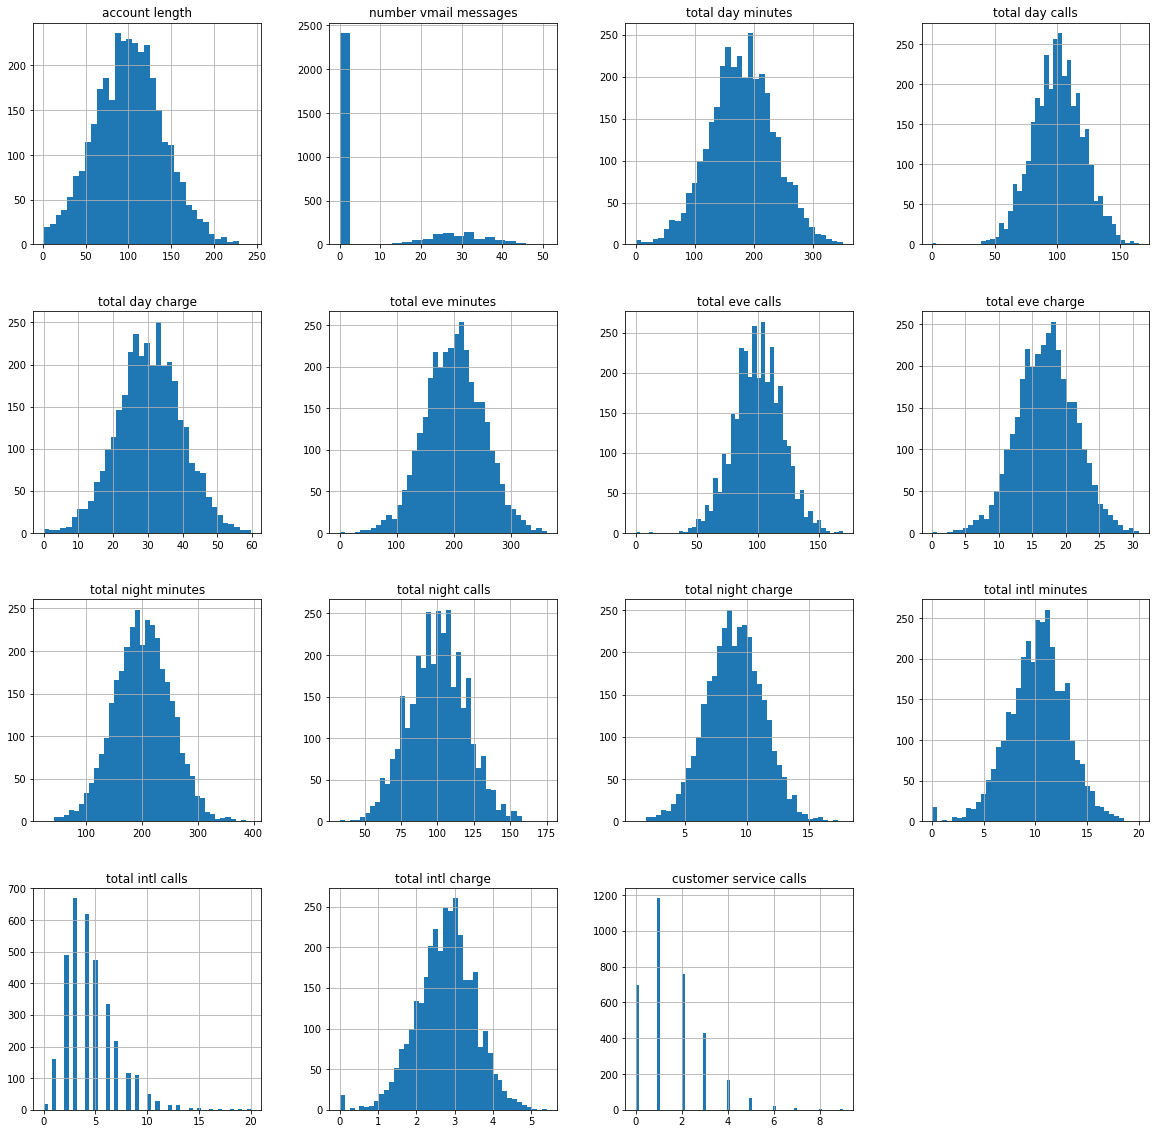

In [37]:
df.hist(bins='auto',figsize=(20,20));

##### Comment
Almost all of the distributions reveal a normal distribution of the features.

It is worth noting that the distribution of `customer service calls` and `total intl calls`are right-tailed.

The `number vmail messages` feature also displays a strange distribution illustrating that alot users opted out of sending/ receiving voice mail messages and very few other people decided to have the voice mail messages.

#### Visualisation of the Categorical Features

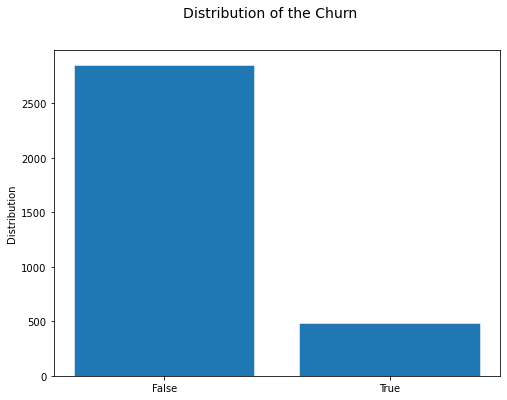

In [38]:
univariate_plot('churn')

Near 15% the customers churned while the rest stayed with Syria Telecommunications.

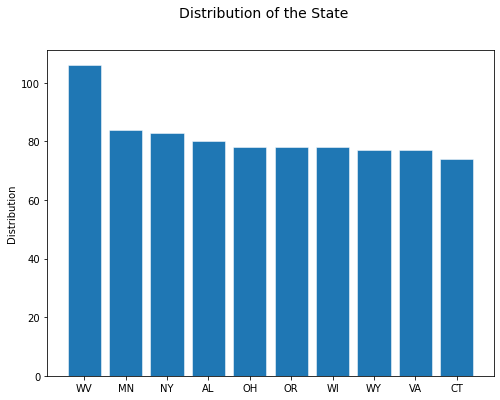

In [39]:
univariate_plot('state')

> West Virginia, Minnesota and New York contain most of Syria Telecommunications customers

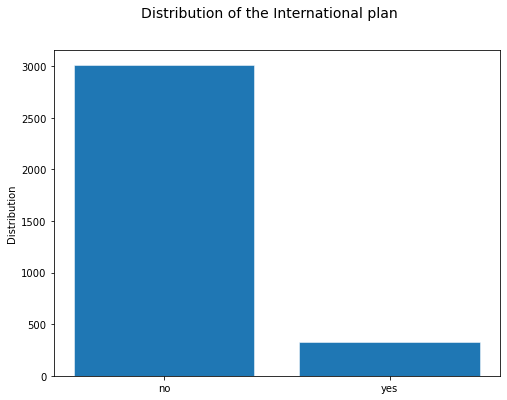

In [40]:
univariate_plot('international plan')

In [41]:
df['international plan'].value_counts(normalize=True)

no     0.90309
yes    0.09691
Name: international plan, dtype: float64

> Near 10% of the customers have an international plan

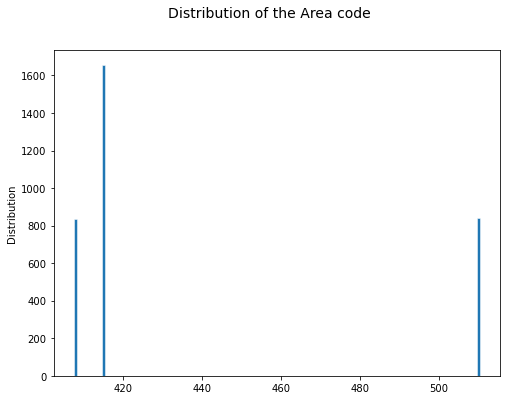

In [42]:
univariate_plot('area code')

> Most of the customers came from the 410 area code region.

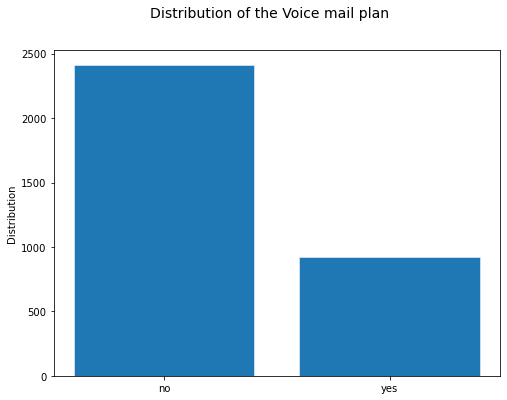

In [43]:
univariate_plot('voice mail plan')

In [44]:
df['voice mail plan'].value_counts(normalize=True)

no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64

> Nearly 28% of the customers have a voice mail plan.

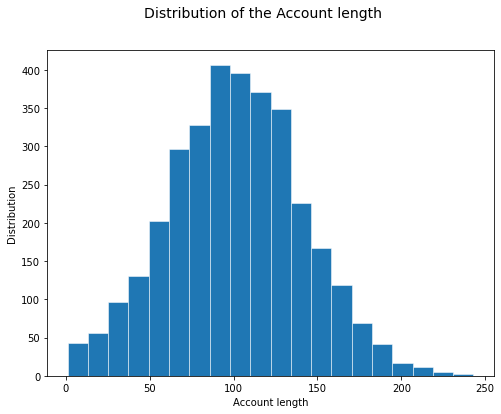

In [45]:
univariate_plot('account length')

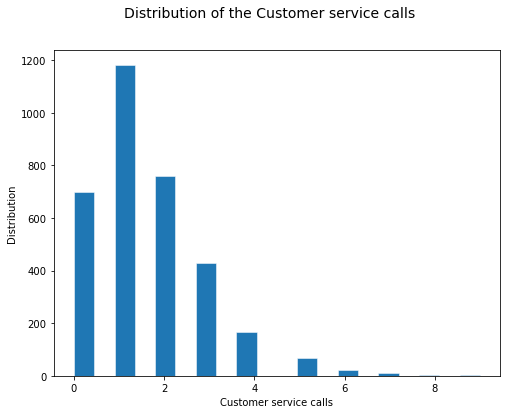

In [46]:
univariate_plot('customer service calls')

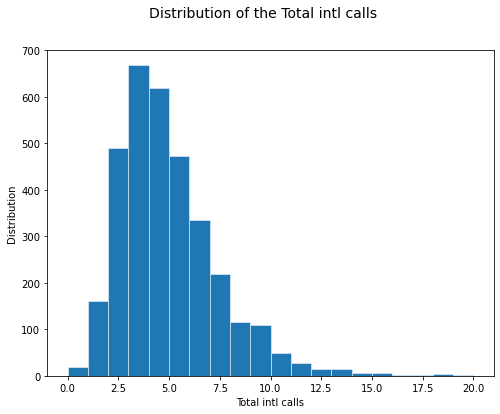

In [47]:
univariate_plot('total intl calls')

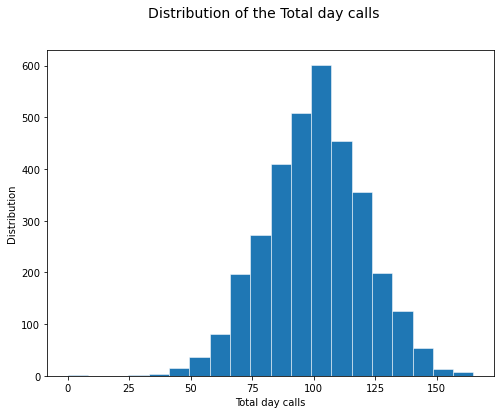

In [48]:
univariate_plot('total day calls')

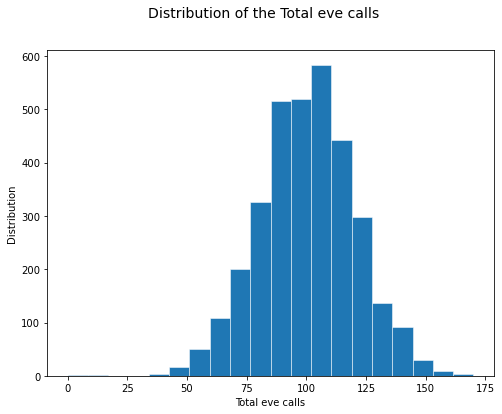

In [49]:
univariate_plot('total eve calls')

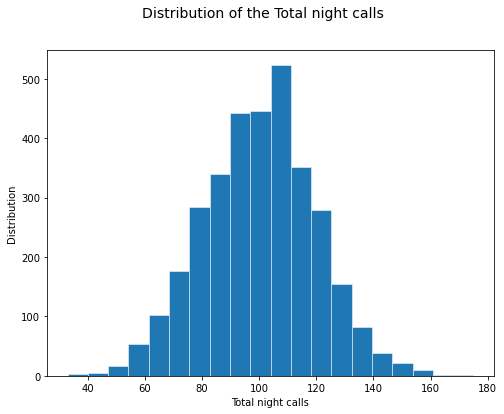

In [50]:
univariate_plot('total night calls')

##### Comment on the Univariate Analysis
***
- The number of people who stayed outweighed the number of people who churned.
- The univariate analysis visually told us that most of our customers came from teh 410 area code.
- The state with the highest number of customers was Washington
- The distributions of the Account Length was normally distributed
- The distributions of the Customer Service calls and Total Intl Calls were right tailed.
- The distributions of the Total Day Calls,  Total Eve Calls and Total Night were left-tailed.

#### Visualisation of Outliers in the dataset

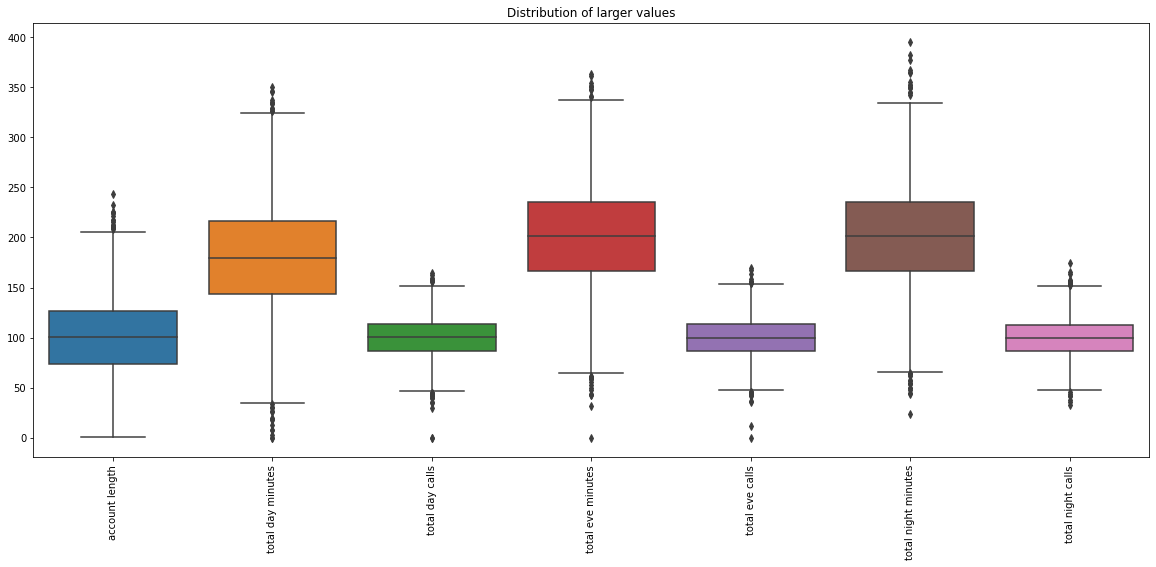

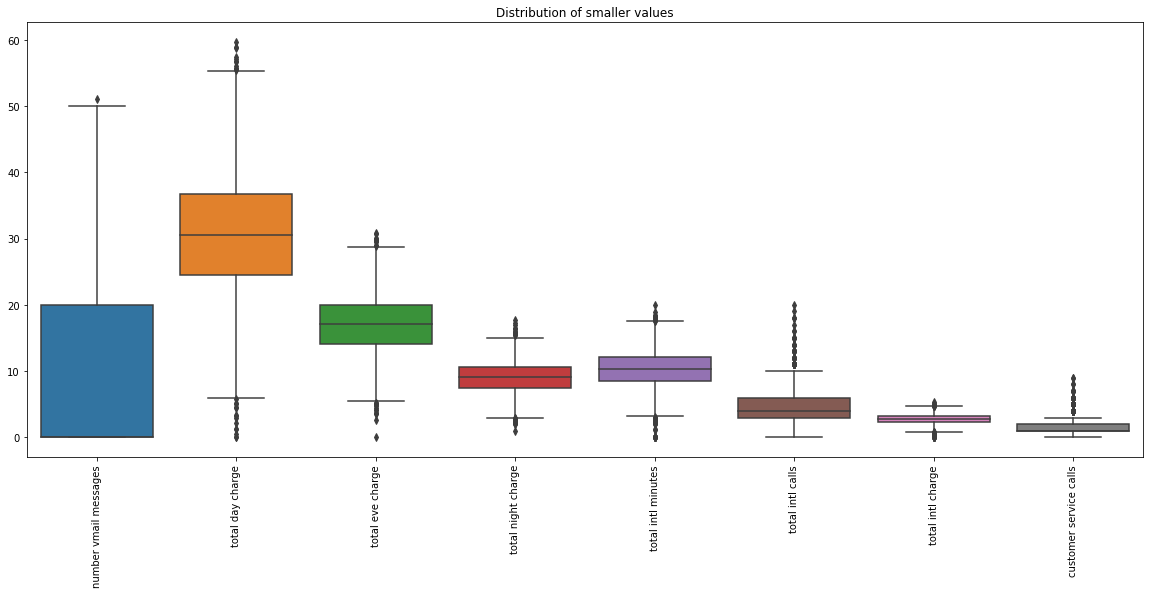

In [51]:
#Checking for outliers in the data
# List of columns for the first boxplot
large_box = ['account length','total day minutes','total day calls', 'total eve minutes',
             'total eve calls','total night minutes','total night calls']

# List of columns for the second boxplot
small_box = ['number vmail messages', 'total day charge', 'total eve charge', 'total night charge',
             'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

def plot_boxplots(lists, larger=True, title=None):
    fig, axes = plt.subplots(figsize=(20, 8))

    sns.boxplot(data=df[lists], ax=axes)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    
    if title == None:
        axes.set_title('Distribution of' + (' larger values' if larger == True else ' smaller values'))

    # Show the plot
    plt.show()
    
plot_boxplots(large_box)
plot_boxplots(small_box, larger=False)

> The boxplot distributions revealed there were some outliers in some of the features. Unfortunately we cannot drop any of these items as they would seriously hurt our sample pool.

### 6.2. Bivariate Analysis

In [52]:
def plot_scatter(first_col, second_col='churn'):
    if first_col in num_cols:
        plt.figure(figsize=(8,6))
        plt.scatter(df[first_col], df[second_col])
        plt.xlabel(f'{first_col.title()}')
        plt.ylabel(f'{second_col.title()}')
        plt.title(f'Distribution of {first_col.title()} against {second_col.title()}', fontsize=14)
        
def plot_graph(dataset, title, ylabel):
    plt.figure(figsize=(8,6))
    plt.bar([state for state in dataset.index], [rate[0] for rate in dataset.values]);
    plt.title(title, fontsize=14)
    plt.ylabel(dataset.columns[0])
    plt.show()

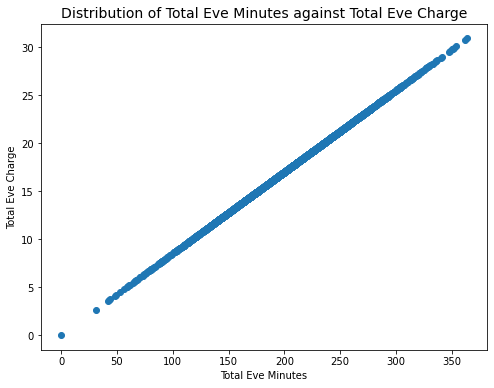

In [53]:
plot_scatter('total eve minutes', 'total eve charge')

> There seems to be a poor correlation between Total Day Minutes against Total Day Calls.

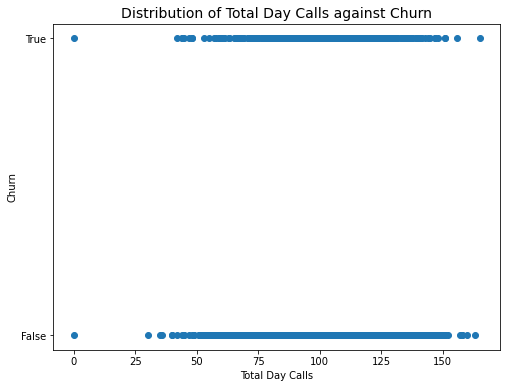

In [54]:
plot_scatter('total day calls')

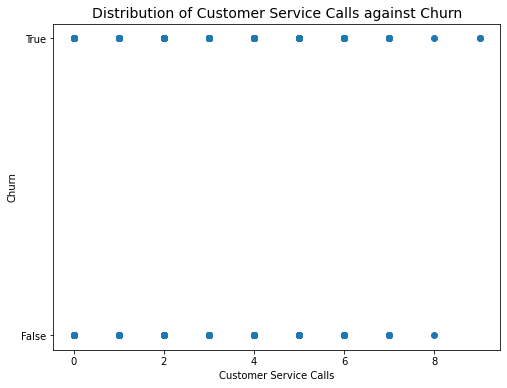

In [55]:
plot_scatter('customer service calls')

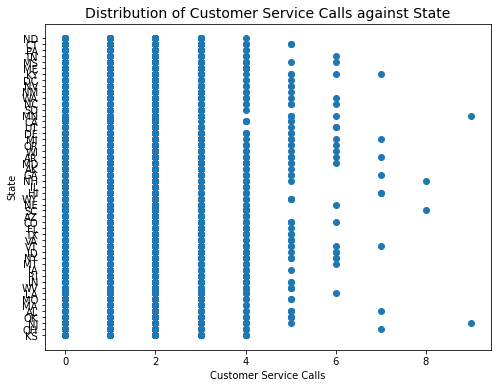

In [56]:
plot_scatter('customer service calls', 'state')

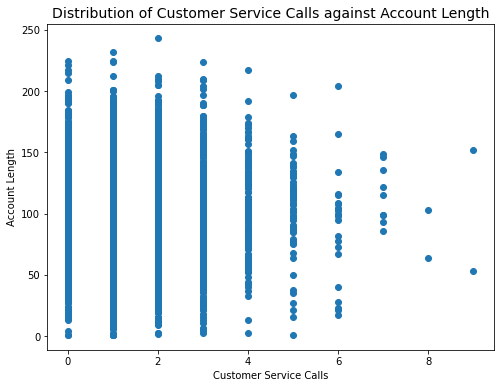

In [57]:
plot_scatter('customer service calls', 'account length')

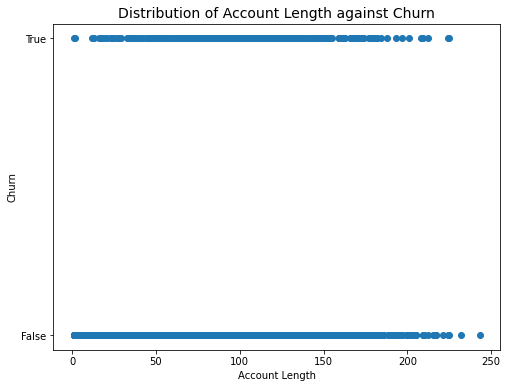

In [58]:
plot_scatter('account length', 'churn')

##### Observations
- Poor correlation between `total day minutes` and `Total Day Calls`. This too can be observed in the `Total Eve Minutes` and `Total Eve Calls` along with `Total Night Minutes` and `Total Night Calls`.
- There exists a perfect relationship between the minutes and their charge for the categories Day, Eve, Night and International.

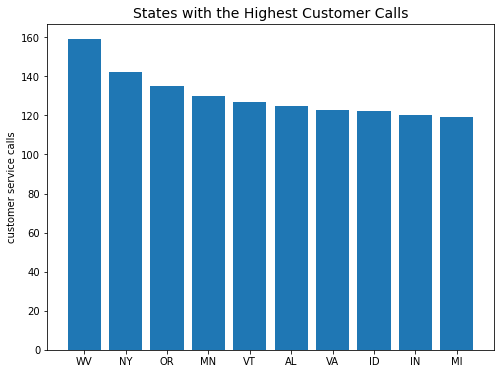

In [59]:
plot_graph(dataset=csc_states, title='States with the Highest Customer Calls', ylabel='Customer Call Rates')

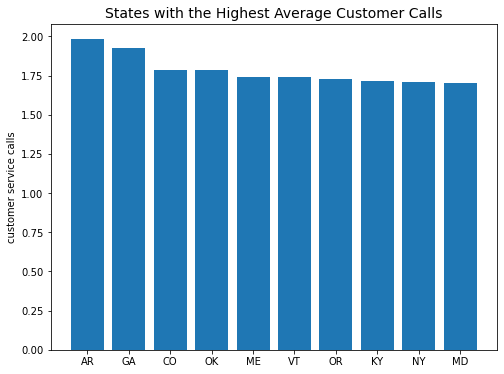

In [60]:
plot_graph(dataset=avg_css_states, title='States with the Highest Average Customer Calls', ylabel='Customer Call Rates')

#### Bivariate Analysis of Numerical Columns against Churn Feature

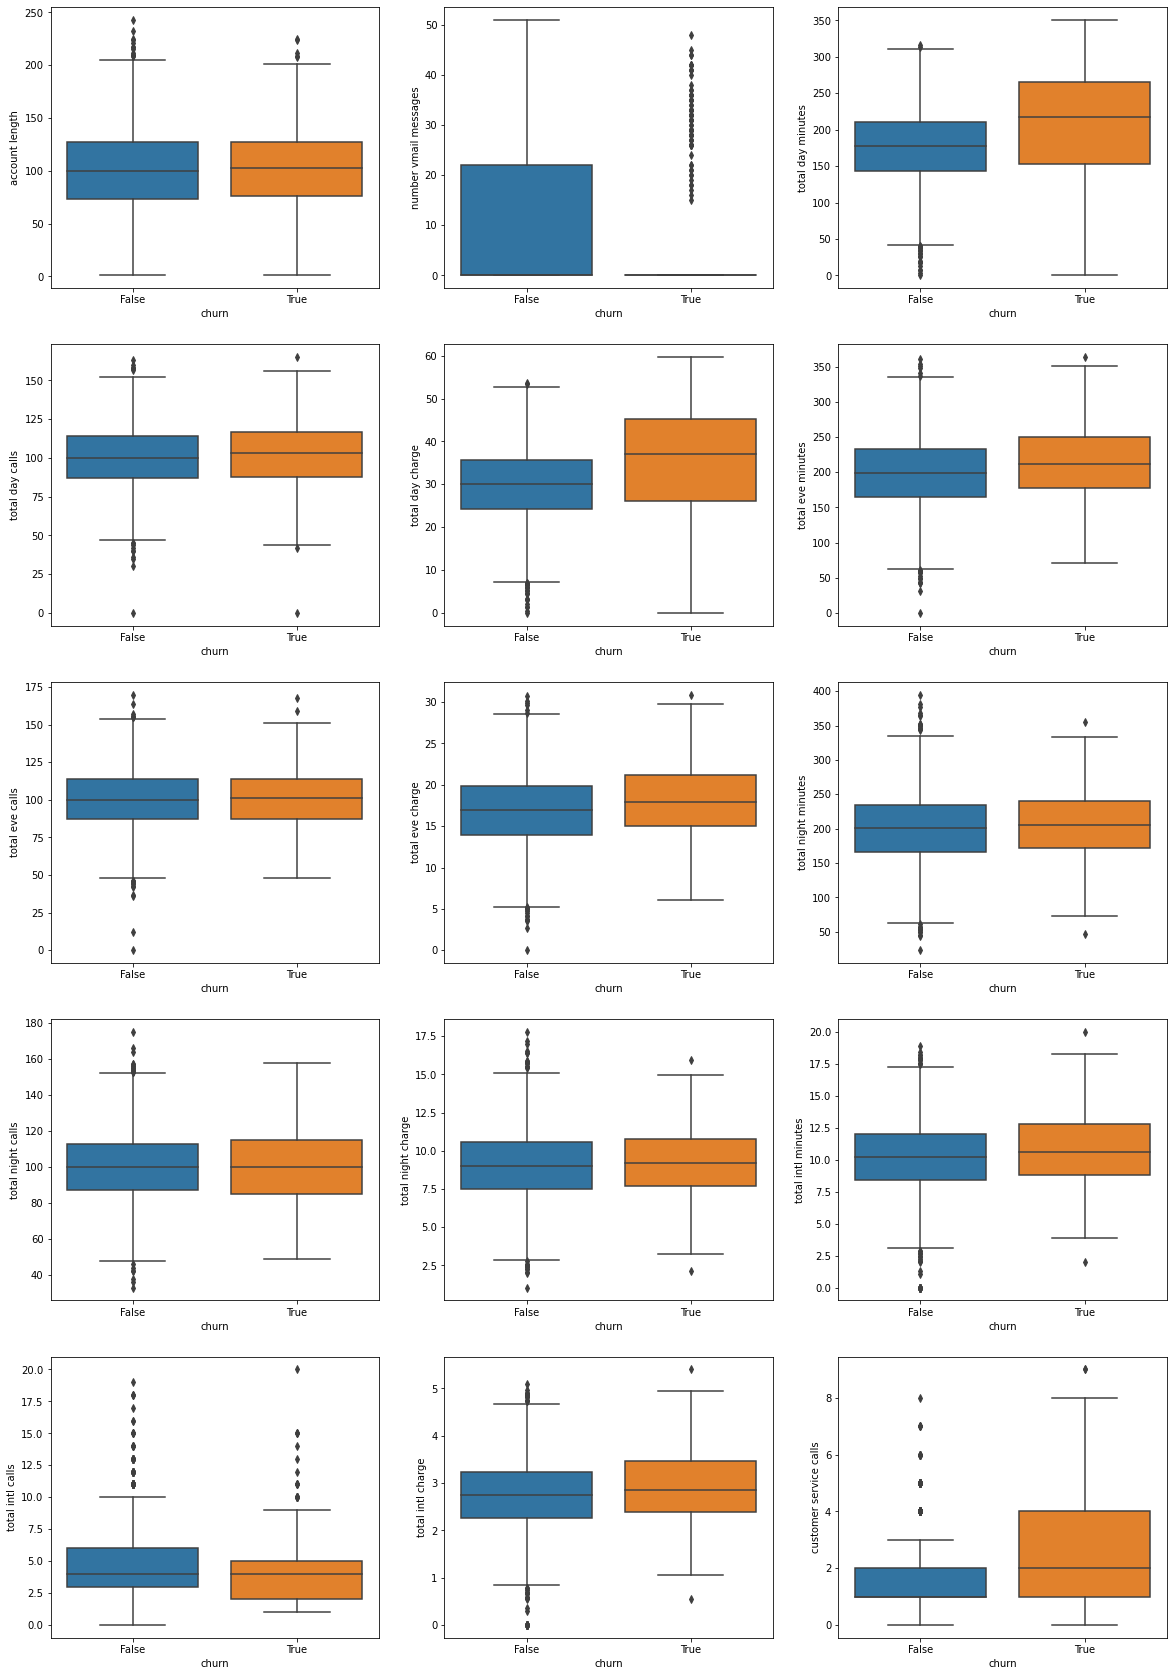

In [61]:
fig, ax = plt.subplots(5, 3, figsize=(20, 30))
"""Add titles here"""
for column, plot in zip(num_cols, ax.flatten()):
    sns.boxplot(x=df['churn'], y=df[column] ,ax=plot);

### 6.3. Multivariate Analysis

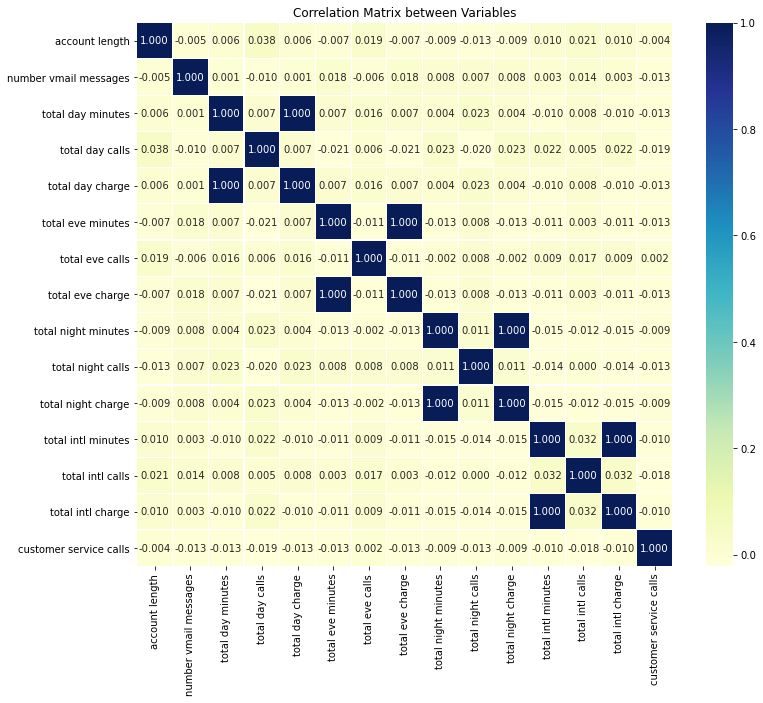

In [62]:
# Calculate the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt=".3f", linewidths=0.1)
plt.title('Correlation Matrix between Variables')
plt.show();

## 7.0. Modelling

We shall explore several models in an attempt to gain the required metric values initially set out at the beginning of the project.

### 7.1 Preprocessing the data

Before working with any of our models, we must use One Hot Encoder for the categorical variables, and StandardScaler for the Numerical Variables.

In addition, we will use the SMOTE technique. The class False outweighs the True class. This might unfairly bias our models into thinking that most of the values belong to the larger class which might promote inaccuracies.

To remedy the situation we can use Synthetic Minority Oversamplying Technique. This algorithm generates new sample data by creating different examples that are combinations of the closest minority class.

#### 7.1.1. Applying the Train-Test Split

In [63]:
# Defining the target
y = df.churn

# Defining the predictors
X = df[df.columns[:-1]]

In [107]:
def preprocessing(test_size=0.2):

    # Imprelementing the Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=8)

    # Separate X data into continuous vs. categorical
    X_train_cont = X_train.select_dtypes(include='number')
    X_test_cont = X_test.select_dtypes(include='number')
    X_train_cat = X_train.select_dtypes(exclude='number')
    X_test_cat = X_test.select_dtypes(exclude='number')

    # Scale continuous values using MinMaxScaler
    scaler = StandardScaler()
    X_train_cont = scaler.fit_transform(X_train_cont)
    X_test_cont = scaler.transform(X_test_cont)

    # Dummy encode categorical values using OneHotEncoder
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_train_cat = ohe.fit_transform(X_train_cat)
    X_test_cat = ohe.transform(X_test_cat)

    # Combine everything back together
    X_train_preprocessed = np.asarray(np.concatenate([X_train_cont, X_train_cat.todense()], axis=1))
    X_test_preprocessed = np.asarray(np.concatenate([X_test_cont, X_test_cat.todense()], axis=1))

    # Label Encoding the target
    # All 0's represent False and 1's represent True
    y_train = LabelEncoder().fit_transform(y_train)
    y_test = LabelEncoder().fit_transform(y_test)
    
    # Synthetic Minority Oversampling Technique
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)
    
    return X_train_resampled, X_test_preprocessed, y_train_resampled, y_test

X_train_resampled, X_test_preprocessed, y_train_resampled, y_test = preprocessing()

#### 7.1.2. Creating Metric Functions

In [157]:
scoring_keeper = []

def scoring_function(name, model, splits=0.2):
    """
    This function only requires a model.
    
    The function will fit it by itself and provide metrics for the SMOTE dataset and non-SMOTE dataset
    """    
    X_train_resampled, X_test_preprocessed, y_train_resampled, y_test = preprocessing(test_size=splits)
    
    smote_model = model.fit(X_train_resampled, y_train_resampled)
    
    # Predict X train and X Test
    smote_train_pred = smote_model.predict(X_train_resampled)
    smote_test_pred = smote_model.predict(X_test_preprocessed)

    cross_val_scores_smote = cross_val_score(smote_model, X_train_resampled, y_train_resampled).mean()

    # Compare model scores
    print(f"""
    Metrics
        Train Accuracy Score: {accuracy_score(y_train_resampled, smote_train_pred)}
        Test Accuracy Score: {accuracy_score(y_test, smote_test_pred)}
        Train Recall Score: {recall_score(y_train_resampled, smote_train_pred)}
        Test Recall Score: {recall_score(y_test, smote_test_pred)}
    """)
    
    # Keep a record of the results
    scoring_keeper.append(
        {'name':name, 'model':model,
         'Accuracy': round(accuracy_score(y_test, smote_test_pred), 4),
         'CV Score': round(cross_val_scores_smote, 4),
         'Recall': round(recall_score(y_test, smote_test_pred), 4)
        }
    )

### 7.2. Classification Models

#### 7.2.1 Dummy Classifier
The DummyClassifier makes predictions that ignore the input features.

This classifier serves as a simple baseline to compare against other more complex classifiers and makes for a perfect starting point

In [158]:
scoring_function(name='DummyClassifier', model=DummyClassifier(random_state=8))


    Metrics
        Train Accuracy Score: 0.5
        Test Accuracy Score: 0.8515742128935532
        Train Recall Score: 0.0
        Test Recall Score: 0.0
    


### 7.2.2. Logistic Regression Model

In [159]:
scoring_function(name='Logistic Regression', model=LogisticRegression(random_state=8, max_iter=200))


    Metrics
        Train Accuracy Score: 0.7951358457493427
        Test Accuracy Score: 0.7781109445277361
        Train Recall Score: 0.803680981595092
        Test Recall Score: 0.7070707070707071
    


### 7.2.3 K-Nearest Neighbors

In [160]:
scoring_function(name='KNN', model=KNeighborsClassifier())


    Metrics
        Train Accuracy Score: 0.922874671340929
        Test Accuracy Score: 0.7436281859070465
        Train Recall Score: 1.0
        Test Recall Score: 0.7878787878787878
    


### 7.2.4. Decision Trees

In [161]:
scoring_function(name='Decision Tree', model=DecisionTreeClassifier(random_state=8))


    Metrics
        Train Accuracy Score: 1.0
        Test Accuracy Score: 0.9070464767616192
        Train Recall Score: 1.0
        Test Recall Score: 0.7676767676767676
    


### 7.2.5 Random Forest Model

In [162]:
scoring_function(name='Random Forest', model=RandomForestClassifier(random_state=8))


    Metrics
        Train Accuracy Score: 1.0
        Test Accuracy Score: 0.9430284857571214
        Train Recall Score: 1.0
        Test Recall Score: 0.7676767676767676
    


### 7.2.7 Gradient Boosting

In [163]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=8)

scoring_function(name='Gradient Boosting', model=gbc)


    Metrics
        Train Accuracy Score: 0.9294478527607362
        Test Accuracy Score: 0.8695652173913043
        Train Recall Score: 0.918054338299737
        Test Recall Score: 0.5252525252525253
    


In [164]:
lf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)

scoring_function(name='AdaBoosting', model=lf)


    Metrics
        Train Accuracy Score: 0.9024978089395267
        Test Accuracy Score: 0.8665667166416792
        Train Recall Score: 0.9031551270815075
        Test Recall Score: 0.6262626262626263
    


### 7.2.8 XGBOOST

In [165]:
scoring_function(name='XGBoost', model=xb.XGBClassifier())


    Metrics
        Train Accuracy Score: 1.0
        Test Accuracy Score: 0.9385307346326837
        Train Recall Score: 1.0
        Test Recall Score: 0.7575757575757576
    


### 7.3. Preliminary Evaluation

Let's take a look at the records stored

In [166]:
for item in scoring_keeper:
    print('\t', item['name'])
    print('\tRecall Score',item['Recall'])
    print('\tCV Score',item['CV Score'])
    print("")

	 DummyClassifier
	Recall Score 0.0
	CV Score 0.4996

	 Logistic Regression
	Recall Score 0.7071
	CV Score 0.7873

	 KNN
	Recall Score 0.7879
	CV Score 0.8804

	 Decision Tree
	Recall Score 0.7677
	CV Score 0.9384

	 Random Forest
	Recall Score 0.7677
	CV Score 0.968

	 Gradient Boosting
	Recall Score 0.5253
	CV Score 0.8911

	 AdaBoosting
	Recall Score 0.6263
	CV Score 0.878

	 XGBoost
	Recall Score 0.7576
	CV Score 0.9695



From the results obtained above, XGBoost scored the highest in Recall scores.

Before making our final conclusion, we try out different ratios of the train test split

In [167]:
def test_split(range_of_values, models_list, names_of_models):
    record = []
    for split in range_of_values:
        X_train, X_test, y_train, y_test = preprocessing(test_size=split)
        for item,model in enumerate(models_list):
            model.fit(X_train, y_train)
            train_score = cross_val_score(model, X_train, y_train).mean()
            test_score = cross_val_score(model, X_test, y_test).mean()
            record.append({'split':split, 'name':names_of_models[item], 
                          'train_score':train_score,
                           'test_score':test_score})
    return record

In [168]:
names_list = []   
model_list = []
for model in scoring_keeper:
    names_list.append(model['name'])
    model_list.append(model['model'])

range_values = [0.5, 0.4, 0.3, 0.2, 0.1]

results = test_split(range_values, model_list, names_list)

[{'split': 0.5,
  'name': 'DummyClassifier',
  'train_score': 0.4992970123022847,
  'test_score': 0.8560284835733938},
 {'split': 0.5,
  'name': 'Logistic Regression',
  'train_score': 0.7958566891746062,
  'test_score': 0.8554260847674022},
 {'split': 0.5,
  'name': 'KNN',
  'train_score': 0.8752665495020505,
  'test_score': 0.8818345291399183},
 {'split': 0.5,
  'name': 'Decision Tree',
  'train_score': 0.9304430672463232,
  'test_score': 0.892632752512992},
 {'split': 0.5,
  'name': 'Random Forest',
  'train_score': 0.9680374926772114,
  'test_score': 0.9184082285878693},
 {'split': 0.5,
  'name': 'Gradient Boosting',
  'train_score': 0.8900804735917122,
  'test_score': 0.8704177231123339},
 {'split': 0.5,
  'name': 'AdaBoosting',
  'train_score': 0.8879462276076835,
  'test_score': 0.8698135261009513},
 {'split': 0.5,
  'name': 'XGBoost',
  'train_score': 0.9634834890389417,
  'test_score': 0.9394022765280251},
 {'split': 0.4,
  'name': 'DummyClassifier',
  'train_score': 0.4997071

In [169]:
results

[{'split': 0.5,
  'name': 'DummyClassifier',
  'train_score': 0.4992970123022847,
  'test_score': 0.8560284835733938},
 {'split': 0.5,
  'name': 'Logistic Regression',
  'train_score': 0.7958566891746062,
  'test_score': 0.8554260847674022},
 {'split': 0.5,
  'name': 'KNN',
  'train_score': 0.8752665495020505,
  'test_score': 0.8818345291399183},
 {'split': 0.5,
  'name': 'Decision Tree',
  'train_score': 0.9304430672463232,
  'test_score': 0.892632752512992},
 {'split': 0.5,
  'name': 'Random Forest',
  'train_score': 0.9680374926772114,
  'test_score': 0.9184082285878693},
 {'split': 0.5,
  'name': 'Gradient Boosting',
  'train_score': 0.8900804735917122,
  'test_score': 0.8704177231123339},
 {'split': 0.5,
  'name': 'AdaBoosting',
  'train_score': 0.8879462276076835,
  'test_score': 0.8698135261009513},
 {'split': 0.5,
  'name': 'XGBoost',
  'train_score': 0.9634834890389417,
  'test_score': 0.9394022765280251},
 {'split': 0.4,
  'name': 'DummyClassifier',
  'train_score': 0.4997071

In [170]:
max_model_train = max(results, key=lambda x:x['train_score'])
max_model_test = max(results, key=lambda x:x['test_score'])
max_model_train,max_model_test

({'split': 0.1,
  'name': 'Random Forest',
  'train_score': 0.9718316397294007,
  'test_score': 0.8833559475350519},
 {'split': 0.4,
  'name': 'XGBoost',
  'train_score': 0.9674860349587597,
  'test_score': 0.9422826729745711})

### 7.4. Hyperparameter Tuning

To effectively tune our parameters, we shall use GridSearchCV that will run all our models.

In [94]:
# Variables that will populate our Grid Search Params
ranges = list(np.arange(80,120,10))
criterion = ["gini", "entropy"]
min_samples_split=list(np.arange(2, 5))
min_samples_leaf=list(np.arange(1, 5))

# The grid search param_dict
param_grid = dict(n_estimators=ranges, criterion=criterion,
                  min_samples_split= min_samples_split,
                  min_samples_leaf = min_samples_leaf )

print(param_grid)

{'n_estimators': [80, 90, 100, 110], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4]}


In [95]:
grid = GridSearchCV(
    RandomForestClassifier(), 
    param_grid, cv=10, 
    scoring='accuracy', 
    return_train_score=False)
grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [80, 90, 100, 110]},
             scoring='accuracy')

In [96]:
# Train Data Score
print(grid.score(X_train_resampled, y_train_resampled))

# Test Data Score
grid.score(X_test_preprocessed, y_test)

1.0


0.9430284857571214

In [99]:
# Saving the best parameters in a variable
rf_parameters = grid.best_params_
rf_parameters

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 90}

In [176]:
# Clear the scoring list to make room for the new models
scoring_keeper.clear()

#### 7.4.2. Hyperparameter Tuning and Train Test Split

We will test the parameters provided by the GridSearch and the results from the Train Test Function to identify the best classification model.

In [177]:
# XGBOOST with the best scores with the Train Test Split
scoring_function(name='XGBoost TTS 0.4', splits=0.4,
                 model=xb.XGBClassifier()
                )


    Metrics
        Train Accuracy Score: 1.0
        Test Accuracy Score: 0.9452773613193404
        Train Recall Score: 1.0
        Test Recall Score: 0.7684210526315789
    


In [178]:
# RandomForest with the best scores with the Train Test Split and best parameters from GridSearchCV
scoring_function(name='RandomForest TTS 0.1', splits=0.1,
                 model=RandomForestClassifier(
                     criterion=rf_parameters['criterion'],
                     min_samples_leaf=rf_parameters['min_samples_leaf'],
                     min_samples_split=rf_parameters['min_samples_split'],
                     n_estimators=rf_parameters['n_estimators'],
                 )
                )


    Metrics
        Train Accuracy Score: 1.0
        Test Accuracy Score: 0.9461077844311377
        Train Recall Score: 1.0
        Test Recall Score: 0.8070175438596491
    


##### Comments
***
XGBoost and RandomForest models gave us a great results. After hyperparameter tuning and picking the right train-test split value, the RandomForest gave us the metrics we requires as per the objectives we set out to achieve.

## 8.0 Conclusions and Recommendations

Based on the results of our churn model, here are some recommendations:

1.Targeted Retention Programs: Utilisation of rewards and discounts to users would help reduce the churn rate, especially those who are about to churn.

2.Training To Customer Care Agents: As the face of the organisation the customer care agents should follow a guideline that allows the customer to feel understood and cared for. Training of these agents would ensure that even disgruntled customers are heard. 

3.Improved Services: Services offered by Syria Tel should be improved through re-evaluation of price points like reduction of the cost of calls or a fixed rate after a certain threshold. Any technical issues faced by clients in certain states should be sorted and amended as soon as possible

4.Continuously collect of feedback from customers: Syria Tel should encourage collection of feedback forms from exiting customers to understand where the users feel unheard.
